**1**

In [0]:
import math

from numpy import *
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
def compute_error_for_given_points(w0, w1, points):
  totalError = 0
  for i in range(len(points)):
    x = points[i, 0]
    y = points[i, 1]
    totalError += (y - (w1*x + w0)) ** 2
  return totalError / float(len(points))
  #return totalError

In [0]:
def step_gradient(w0_current, w1_current, points, learning_rate):
  w0_gradient = 0
  w1_gradient = 0
  N = float(len(points))
  
  for i in range(len(points)):
    x = points[i, 0]
    y = points[i, 1]
    w0_gradient += -(2/N) * (y - (w1_current*x + w0_current)) 
    w1_gradient += -(2/N) * x * (y - (w1_current*x + w0_current))
    
  new_w0 = w0_current - (learning_rate * w0_gradient)
  new_w1 = w1_current - (learning_rate * w1_gradient)
  
  return [new_w0, new_w1]

In [0]:
def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations):
  w0 = starting_w0
  w1 = starting_w1
  for i in range(num_iterations):
    w0, w1 = step_gradient(w0, w1, points, learning_rate)
    
  return [w0, w1]

In [0]:
def run():
  income = 'https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/simple_linear_regression/data/income.csv'
  points = genfromtxt(income, delimiter=',')
  learning_rate = 0.0001
  
  #y = w1x + w0
  initial_w0 = 0
  initial_w1 = 0
  num_iterations = 1000
  
  print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
  print("Running...")
  
  [w0, w1] = gradient_descent_runner(points, initial_w0, initial_w1, learning_rate, num_iterations)
    
  print("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, w0, w1, compute_error_for_given_points(w0, w1, points)))
  
run()
  

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 1000 iterations w0 = -0.18234255376510086, w1 = 3.262182267596014, error = 103.39842291729676


**2**

In [0]:
def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations, rss_by_run):
  w0 = starting_w0
  w1 = starting_w1
  for i in range(num_iterations):
    w0, w1 = step_gradient(w0, w1, points, learning_rate)
    rss = compute_error_for_given_points(w0, w1, points)
    rss_by_run.append(rss)
    print(rss)
  return [w0, w1]

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
2648.2381266261386
2381.1735926230144
2142.151013653971
1928.2259499305476
1736.7631314659504
1565.4039948653665
1412.0376287932477
1274.7747702022896
1151.924530990372
1041.9735683871631
943.5674424757678
855.4939311975465
776.6680973019634
706.1189232850785
642.9773496759485
586.4655693176774
535.8874457621318
490.61993774500473
450.105424101551
413.8448345756185
381.3915019021827
352.34565942878487
326.34951649348716
303.0828508942081
282.2590641541991
263.6216509895024
246.94103948667004
232.01176306571264
218.6499293904183
206.69095504620364
195.9875380795778
186.40784342345904
177.83387885506545
170.16004148022643
163.29181683863047
157.1446146046226
151.64272654085167
146.7183938680661
142.3109725622303
138.36618629647026
134.83545782503415
131.67531057276102
128.84683305839033
126.31519955408457
124.04924107629077
122.02106142309056
120.20569352810008
118.58079189763411
117.12635734234605
115.824

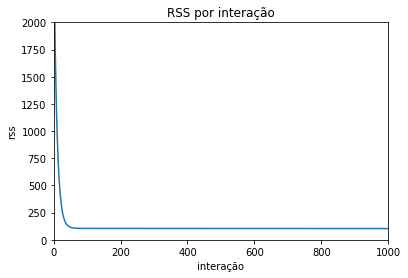

In [0]:
def run():
  income = 'https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/simple_linear_regression/data/income.csv'
  points = genfromtxt(income, delimiter=',')
  learning_rate = 0.0001
  
  #y = w1x + w0
  initial_w0 = 0
  initial_w1 = 0
  num_iterations = 1000
  
  rss_by_run = []
  
  print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
  print("Running...")
  
  [w0, w1] = gradient_descent_runner(points, initial_w0, initial_w1, learning_rate, num_iterations, rss_by_run)
    
  print("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, w0, w1, compute_error_for_given_points(w0, w1, points)))
  
  iterations = arange(1, num_iterations + 1)
  plt.plot(iterations, rss_by_run)
  plt.title('RSS por interação')
  plt.xlabel('interação')
  plt.ylabel('rss')
  plt.axis([0, 1000, 0, 2000])
  plt.show()
  
run()

**3** O RSS diminui, e a cada interação a diferença entre o valor atual e o anterior é menor. Isso acontece porque, como ele é uma função do segundo grau com curva convexa, sempre que temos uma interação do algoritmo descendente, estamos nos aproximando do mínimo dessa curva e a tendência é que a diferença sempre seja menor, pois a diferença entre as derivadas vai diminuindo.

**4**

In [0]:
def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations):
  w0 = starting_w0
  w1 = starting_w1
  for i in range(num_iterations):
    w0, w1 = step_gradient(w0, w1, points, learning_rate)
    
  return [w0, w1]

In [0]:
def run():
  income = 'https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/simple_linear_regression/data/income.csv'
  points = genfromtxt(income, delimiter=',')
  learning_rate = 0.001
  
  #y = w1x + w0
  initial_w0 = 0
  initial_w1 = 0
  num_iterations = 100000
  
  print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
  print("Running...")
  
  [w0, w1] = gradient_descent_runner(points, initial_w0, initial_w1, learning_rate, num_iterations)
    
  print("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, w0, w1, compute_error_for_given_points(w0, w1, points)))
  
run()

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 100000 iterations w0 = -39.44332204413956, w1 = 5.599308181295304, error = 29.82881660998503


O valor para o número de iterações foi de 100000 e para o learning_rate foi de 0.001

**5**

In [0]:
def tamanho_gradiente(w0, w1, points):
  w0_gradient = 0
  w1_gradient = 0
  N = float(len(points))
  for i in range(len(points)):
    x = points[i, 0]
    y = points[i, 1]
    w0_gradient += -(2/N) * (y - (w1*x + w0)) 
    w1_gradient += -(2/N) * x * (y - (w1*x + w0))
    
  tamanho = math.sqrt((w0_gradient ** 2) + (w1_gradient ** 2))
  return tamanho

In [0]:
def gradient_descent_runner_with_condition(points, starting_w0, starting_w1, learning_rate):
  w0 = starting_w0
  w1 = starting_w1
  tolerancia = math.sqrt(compute_error_for_given_points(w0, w1, points))
  
  while (tamanho_gradiente(w0, w1, points) >= tolerancia):
    
    w0, w1 = step_gradient(w0, w1, points, learning_rate)
    
  return [w0, w1]

In [0]:
def run():
  income = 'https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/simple_linear_regression/data/income.csv'
  points = genfromtxt(income, delimiter=',')
  learning_rate = 0.001
  
  #y = w1x + w0
  initial_w0 = 0
  initial_w1 = 0
  num_iterations = 100000
  
  print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
  print("Running...")
  
  [w0, w1] = gradient_descent_runner_with_condition(points, initial_w0, initial_w1, learning_rate)
    
  print("w0 = {0}, w1 = {1}, error = {2}".format(w0, w1, compute_error_for_given_points(w0, w1, points)))
  
run()

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
w0 = 0.17002444717446072, w1 = 3.173922239169607, error = 105.95695074236122


**6**

In [0]:
def gradient_descent_runner_with_condition(points, starting_w0, starting_w1, learning_rate, tolerancia):
  w0 = starting_w0
  w1 = starting_w1
  
  condicao = True
  
  while (tamanho_gradiente(w0, w1, points) >= tolerancia):
    w0, w1 = step_gradient(w0, w1, points, learning_rate)
    
  return [w0, w1]

In [0]:
def run():
  income = 'https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/simple_linear_regression/data/income.csv'
  points = genfromtxt(income, delimiter=',')
  learning_rate = 0.001
  
  #y = w1x + w0
  initial_w0 = 0
  initial_w1 = 0
  num_iterations = 100000
  tolerancia = 10**-2
  
  print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
  print("Running...")
  
  [w0, w1] = gradient_descent_runner_with_condition(points, initial_w0, initial_w1, learning_rate, tolerancia)
    
  print("w0 = {0}, w1 = {1}, error = {2}".format(w0, w1, compute_error_for_given_points(w0, w1, points)))
  
run()

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
w0 = -39.34129757395788, w1 = 5.593234872982873, error = 29.829341915364406


O valor de tolerância foi igual a 0.02, onde o erro (MSE) é aproximadamente igual a 29.8, fazendo com que os valores dos parâmetros w0 e w1 fiquem aproximadamente iguais a -39 e 5.

**7**

In [0]:
def forma_normal(points):
  tempx = 0
  tempy = 0
  N = len(points)
  
  for i in range(len(points)):
    tempx += points[i, 0]
    tempy += points[i, 1]
  mx = tempx / N
  my = tempy / N
  
  a = 0
  b = 0
  
  for i in range(len(points)):
    x = points[i, 0]
    y = points[i, 1]
    a += (x - mx) * (y - my)
    b += (x - mx) ** 2
    
  normal_w1 = a / b
  normal_w0 = my - (normal_w1 * mx)
  
  return [normal_w0, normal_w1]


In [0]:
import time

In [0]:
def run():
  income = 'https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/simple_linear_regression/data/income.csv'
  points = genfromtxt(income, delimiter=',')
  learning_rate = 0.001
  
  #y = w1x + w0
  initial_w0 = 0
  initial_w1 = 0
  num_iterations = 100000
  tolerancia = 10**-2
  
  print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
  print("Running...")
  
  inicio = time.time()
  [w0, w1] = gradient_descent_runner_with_condition(points, initial_w0, initial_w1, learning_rate, tolerancia)
  fim = time.time()
    
  print("w0 = {0}, w1 = {1}, error = {2}, tempo = {3}".format(w0, w1, compute_error_for_given_points(w0, w1, points), (fim - inicio)))
  
  print("Starting forma normal at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
  print("Running...")
  
  inicio = time.time()
  [w0, w1] = forma_normal(points)
  fim = time.time()
  
  print("w0 = {0}, w1 = {1}, error = {2}, tempo = {3}".format(w0, w1, compute_error_for_given_points(w0, w1, points), (fim - inicio)))
  
run()

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
w0 = -39.34129757395788, w1 = 5.593234872982873, error = 29.829341915364406, tempo = 4.302363872528076
Starting forma normal at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
w0 = -39.44625667909617, w1 = 5.599482874119919, error = 29.82881619900623, tempo = 5.14984130859375e-05


Como vemos, o tempo de processamento para a forma fechada é bem menor.